#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

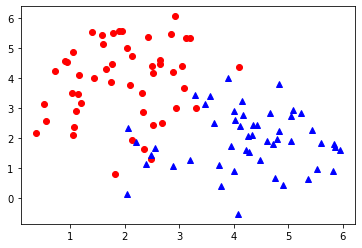

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0], X[:,1][y==0], 'o',color='red')
plt.plot(X[:,0][y==1], X[:,1][y==1], '^',color='blue')

In [4]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [5]:
def predict_y(x, w, b = 0):
    return sigmoid(np.dot(x, w) + b)

In [6]:
predict_y(X[0], np.array([[1, 2]]).T)

array([0.99999775])

In [7]:
def loss(y_hat, y):
    return np.sum(np.square(y_hat - y)) / 2

In [8]:
def gradient_descent(x, w_ini, y, lr, num_iters, tol = 1e-20):
    w = w_ini[0:2]
    b = w_ini[2,0]
    y = y.reshape(-1,1)
    errors = []
    
    for i in range(num_iters):
        y_hat = predict_y(x, w, b)
        common = (y_hat - y) * y_hat * (1 - y_hat)
        gradient_w = np.dot(x.T, common)
        gradient_b = np.sum(common)
#         print(gradient)
        error = loss(y_hat, y)
        errors.append(error)

        delta_w = -lr * gradient_w
        delta_b = -lr * gradient_b
#         print(delta_w)
        if (error < tol):
            break
        w = w + delta_w
        b = b + delta_b    
#         print(w)
        
    plt.plot(np.arange(len(errors)), errors)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    return np.vstack((w,b))

In [9]:
w_ini = np.array([[0, 1, 0.5]]).T

array([[ 1.29193815],
       [-1.30648271],
       [-0.09871507]])

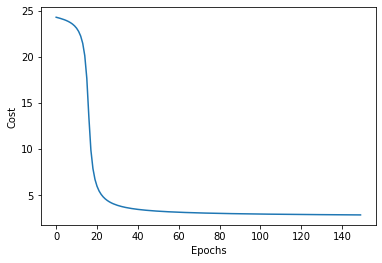

In [10]:
w_logistic = gradient_descent(X, w_ini, y, 0.01, 150)
w_logistic

In [11]:
def get_x2(x1, w):
    return -(w[0] * x1 + w[2]) / w[1]

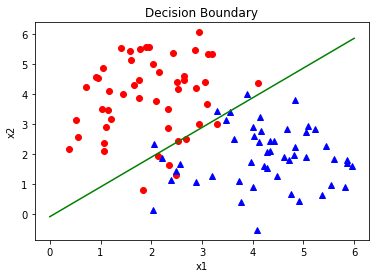

In [12]:
plt.plot(X[:,0][y==0], X[:,1][y==0], 'o',color='red')
plt.plot(X[:,0][y==1], X[:,1][y==1], '^',color='blue')

x1_plot = np.array([0,6])
plt.plot(x1_plot, get_x2(x1_plot, w_logistic), color = 'green')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")
plt.show()

---